In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cv2
from numpy import linalg as LA
import math

In [15]:
#Part 1

#The MNIST dataset has been converted in vectors and stored as csv file

train = pd.read_csv('mnist_traindata.csv')
train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
index1=(train[train['label']==4]).index.tolist()
var=train.loc[train.index.isin(index1)]
new=var.drop('label',axis=1)
temp=new
index=new.index.tolist()
new.shape

(5842, 784)

Text(0, 0.5, 'Eigen Values in increasing order')

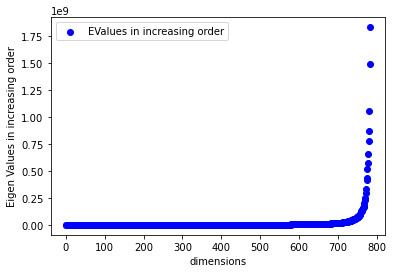

In [17]:
means=new.mean(0)
new=np.array(new)
for i in range (new.shape[0]):
    new[i,:]=new[i,:]-means
cmat=np.dot((new.T),new)
evals,evec=np.linalg.eigh(cmat)
xx=np.arange(0,784)
plt.scatter(xx,evals, color = 'blue', label='EValues in increasing order')
plt.legend()
plt.xlabel("dimensions")
plt.ylabel("Eigen Values in increasing order")

Text(0.5, 1.0, 'Reconstructed image')

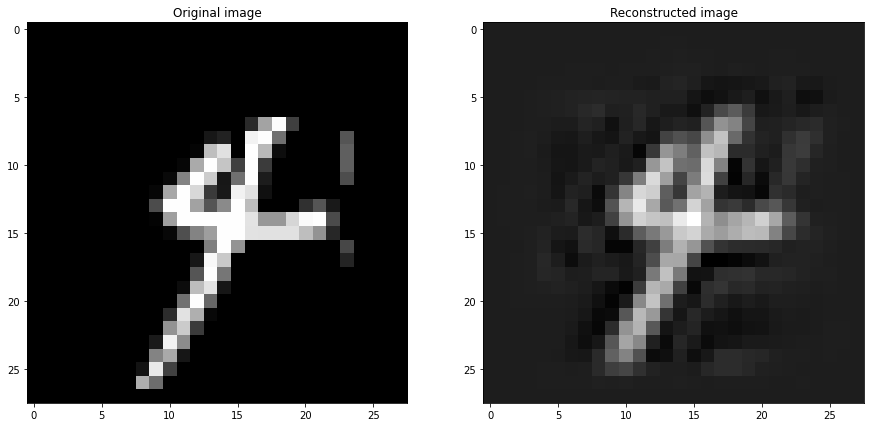

In [18]:
basis=evec[:,700:]
y=np.dot(new,(basis))
res=np.dot(y,(basis.T))
for i in range (3795):
    res[i,:]=res[i,:]+means
#print(res)
img1=res[4,:]
figure=plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
temp=np.array(temp)
img2=temp[4,:]
img2=img2.reshape(28,28)
plt.imshow(img2,cmap='gray')
plt.title('Original image')
plt.subplot(1,2,2)
img1=img1.reshape(28,28)
plt.imshow(img1,cmap='gray')
plt.title('Reconstructed image')

Text(0.5, 1.0, 'Reconstructed image')

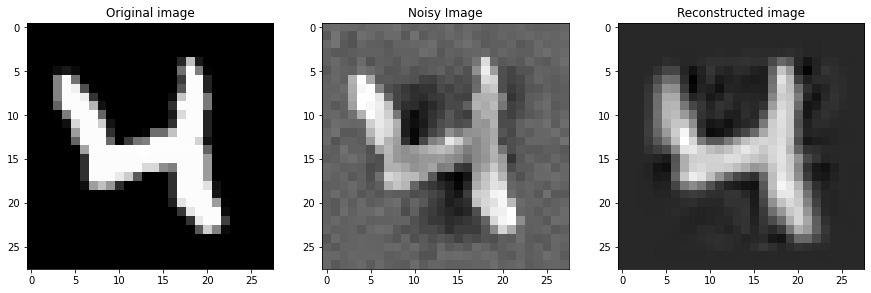

In [20]:
# part2 Doing PCA after adding noise

#creating a noisy image'''
noise=[]
for i in range(len(new)):
    new1=new[i,:]
    noisy_img = new1 + np.random.normal(0, 10, new1.shape)
    noisy_img=list(noisy_img)
    noise.extend(noisy_img)
a = np.array(noise).reshape(-1,784)

'''We will use the same basis as above constructed 
    using 1st 84 eigen vectors'''

y=np.dot(a,(basis))
res=np.dot(y,(basis.T))
for i in range (3795):
    res[i,:]=res[i,:]+means
#print(res)
figure=plt.figure(figsize=(15,15))
plt.subplot(1,3,1)
img2=temp[2,:]
img2=img2.reshape(28,28)
plt.imshow(img2,cmap='gray')
plt.title('Original image')
plt.subplot(1,3,2)
x=a[2,:]
x=x.reshape(28,28)
plt.imshow(x,cmap='gray')
plt.title('Noisy Image')
res1=res[2,:]
res1=res1.reshape(28,28)
plt.subplot(1,3,3),plt.imshow(res1,cmap='gray')
plt.title('Reconstructed image')